In [ ]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import the packages needed for Exploratory Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# List of desired column names
columns = ['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope',
'pelvic radius', 'grade of spondylolisthesis', 'class']

# Load the dataset from the existing directory
df = pd.read_csv('vertebral_column_data.txt', names = columns, sep = ' ')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pelvic incidence            310 non-null    float64
 1   pelvic tilt                 310 non-null    float64
 2   lumbar lordosis angle       310 non-null    float64
 3   sacral slope                310 non-null    float64
 4   pelvic radius               310 non-null    float64
 5   grade of spondylolisthesis  310 non-null    float64
 6   class                       310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


For proper analysis, the definition of the metrics and their range munst be clear. The following provides the information about each metric with reliable sources:
- pelvic incidence:
    pelvic incidence can vary from 33° to 85° in the normal population, pelvic incidence is in fact the sum of pelvic tilt and sacral slope of the subjects.
    
   https://link.springer.com/article/10.1007/s00586-011-1923-2
    
- pelvic tilt:
    demonstrated an average of 13 (+/- 6) degrees of anterior pelvic tilt with range of -4.5 - 27 degrees of anterior pelvic tilt in asymptomatic adults. 
    
    https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8486407/
- lumber lordosis angle:
    means men (28.39◦ ± 0.47◦ (SEM))and women (28.59◦ ± 0.43◦ (SEM))

    https://www.researchgate.net/publication/51710697_Effect_of_Age_and_Lordotic_Angle_on_the_Level_of_Lumbar_Disc_Herniation
- sacral slope:
    https://journals.sagepub.com/doi/epub/10.1177/2309499019888809
    
- pelvic radius:

- grade of spondylolisthesis:
    level of pain from spondylolisthesis.

In [4]:
df.tail()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,class
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO
309,33.84,5.07,36.64,28.77,123.95,-0.20,NO


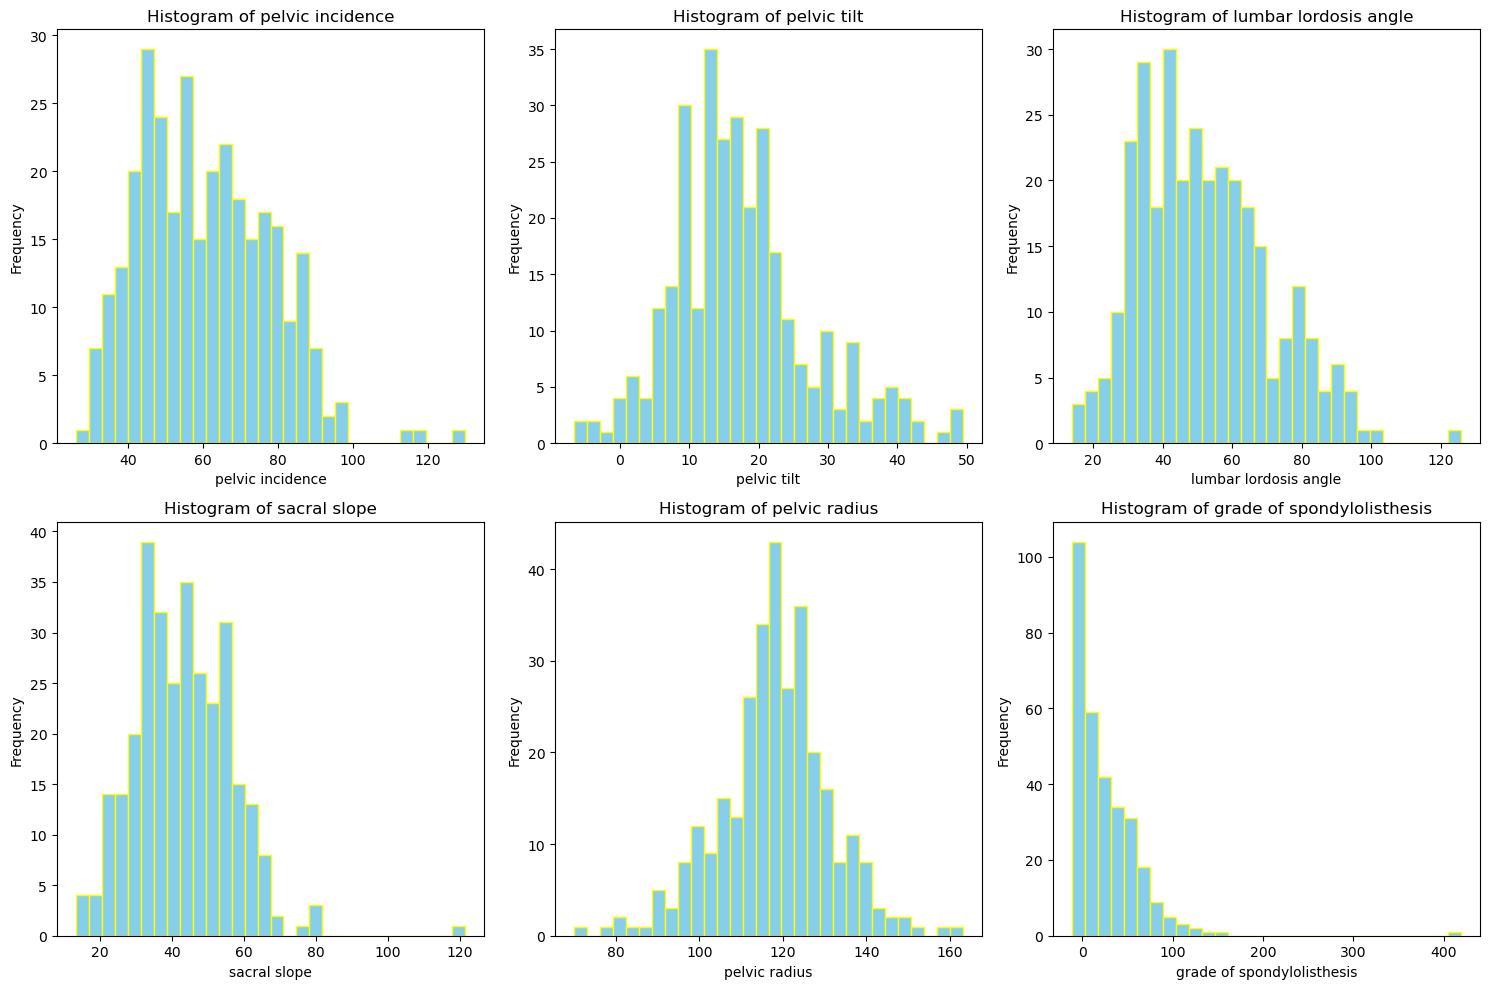

In [5]:
# Create a figure with six subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each feature in the DataFrame
for i, column in enumerate(df.drop('class', axis = 1).columns):
    # Create a histogram for the current feature
    axes[i].hist(df[column], bins=30, color='skyblue', edgecolor='yellow')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Save figure
plt.savefig('uni_histograms.png')

# Show the subplots
plt.show()

   pelvic incidence  pelvic tilt  lumbar lordosis angle  sacral slope  \
0               210          210                    210           210   
1               100          100                    100           100   

   pelvic radius  grade of spondylolisthesis  
0            210                         210  
1            100                         100  


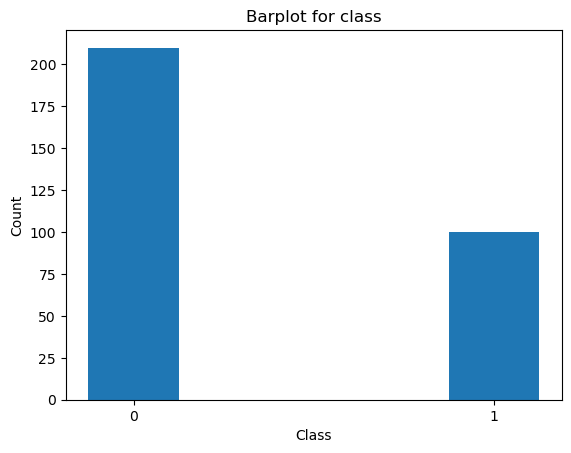

In [6]:
grouped = df.groupby('class').count()
grouped.reset_index(inplace = True, drop = True)

print(grouped)
# Bar plot for class
plt.bar(grouped.index, grouped['pelvic incidence'], width = 0.25)
plt.title('Barplot for class')
plt.ylabel('Count')
plt.xlabel('Class')
plt.xticks([0,1])
# Save figure
plt.savefig('class_bar.png')

plt.show()

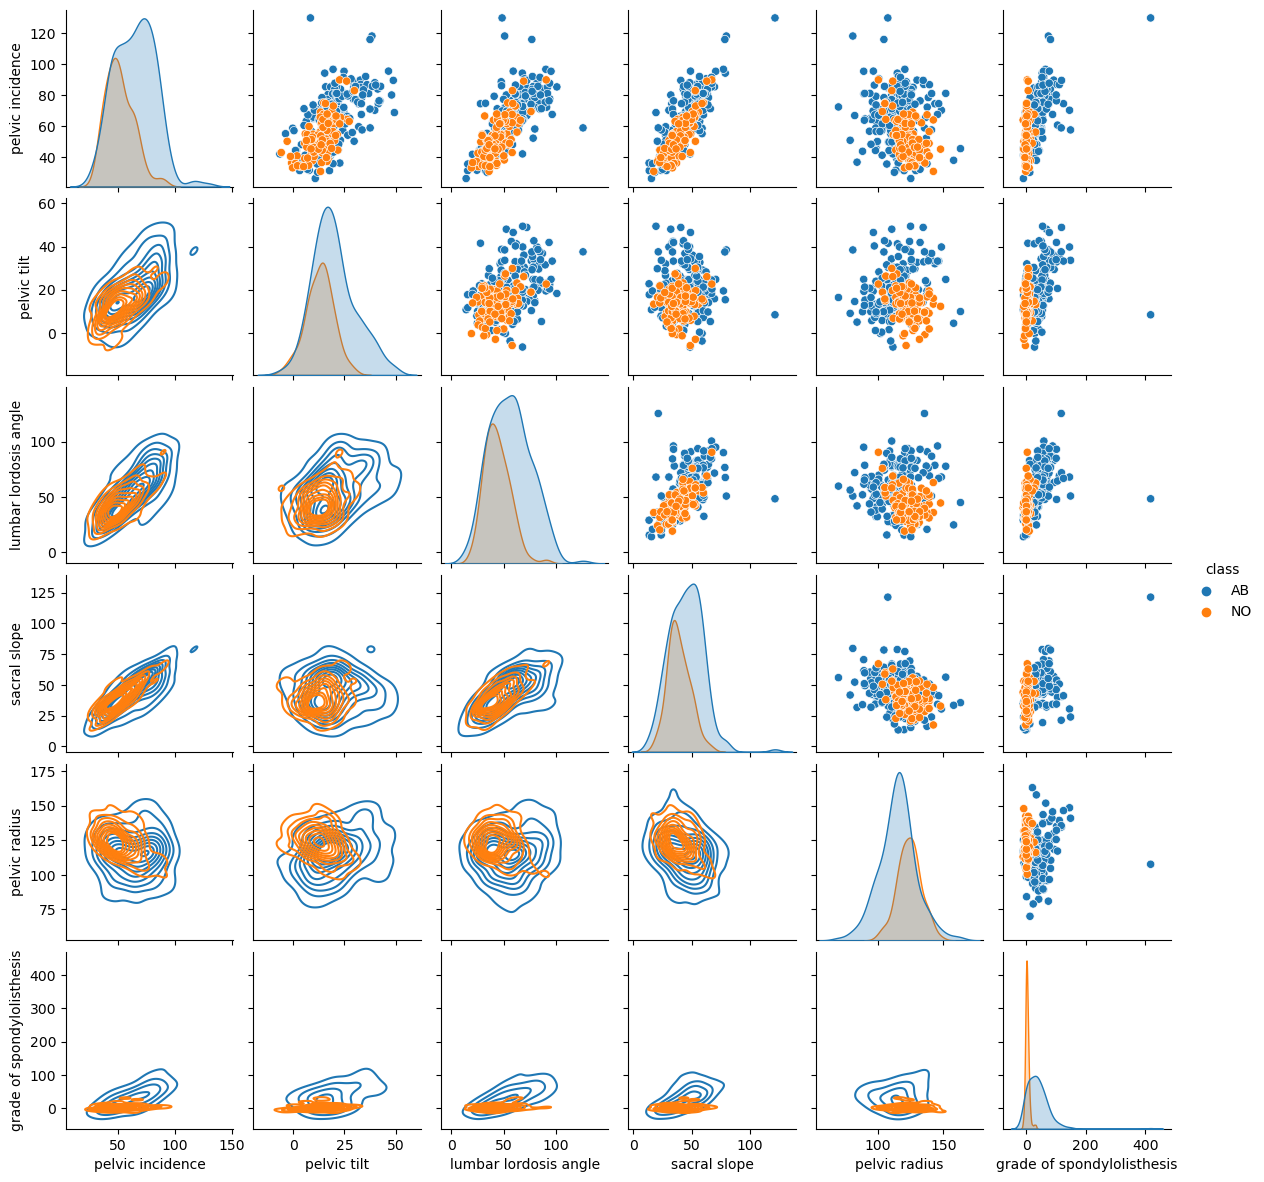

In [7]:
pairplot = sns.pairplot(df, hue="class", height=2)
# Clear lower diagonal
def clear_lower(*args, **kwargs):
    plt.gca().clear()

pairplot.map_lower(clear_lower)
pairplot = pairplot.map_lower(sns.kdeplot, cmap='Reds')

# Save the pairplot as a PNG file
pairplot.savefig('pairplot.png')

Looking at the density plots of each columns, most of which 'NO' patients have measurements for the pelvis  very close to 'AB' patients and their mean are close.

In [8]:
# Check for class size for 'NO' and 'AB'
no_df = df[df['class'] == 'NO']
ab_df = df[df['class'] == 'AB']
print('Normal:',str(len(df[df['class'] == 'NO'])))
print('Abnormal:',str(len(df[df['class'] == 'AB'])))

Normal: 100
Abnormal: 210


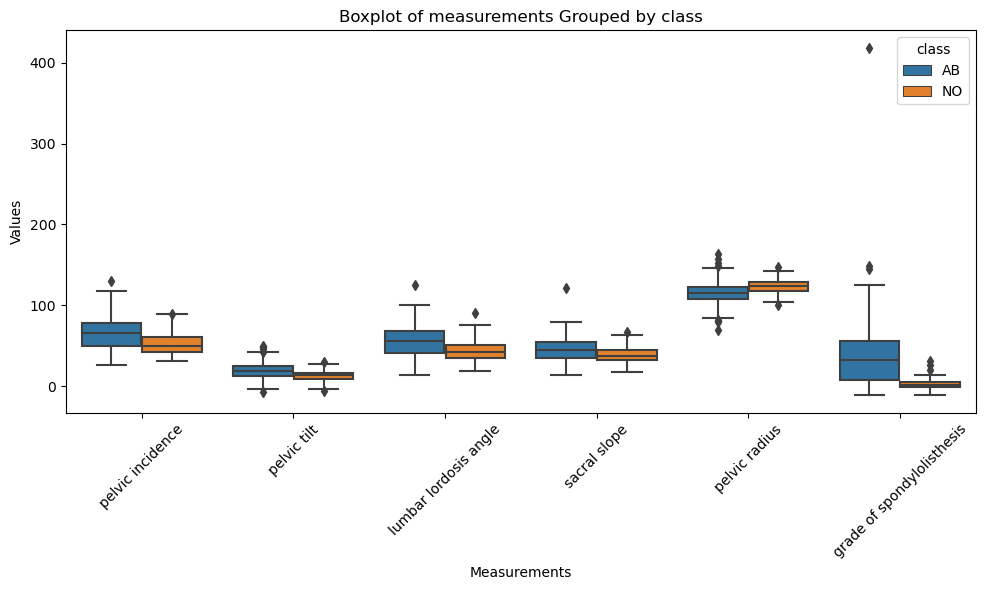

In [9]:
# Look into the abnormal patients
ab_df.describe()

# Melt the DataFrame to convert it to long format
melted_df = pd.melt(df, id_vars=['class'], var_name='Measurements', value_name='Value')

# Create a boxplot with all variables on a single plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Measurements', y='Value', hue='class', data=melted_df)
plt.title('Boxplot of measurements Grouped by class')
plt.xlabel('Measurements')
plt.ylabel('Values')
plt.legend(title='class')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('boxplot_grid.png')

# Show the plot
plt.show()

# Outlier

In [10]:
df_imputed = df.copy()

In [11]:
df_imputed[df_imputed['grade of spondylolisthesis'] > 300]

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,class
115,129.83,8.4,48.38,121.43,107.69,418.54,AB


This patient has pelvic and lumber measurements being outliers from the boxplots of every measure, therefore it should be removed form the data of which reduces the bias of the classification model

In [12]:
df_imputed = df_imputed[df_imputed['grade of spondylolisthesis'] < 300]

# Data transformation

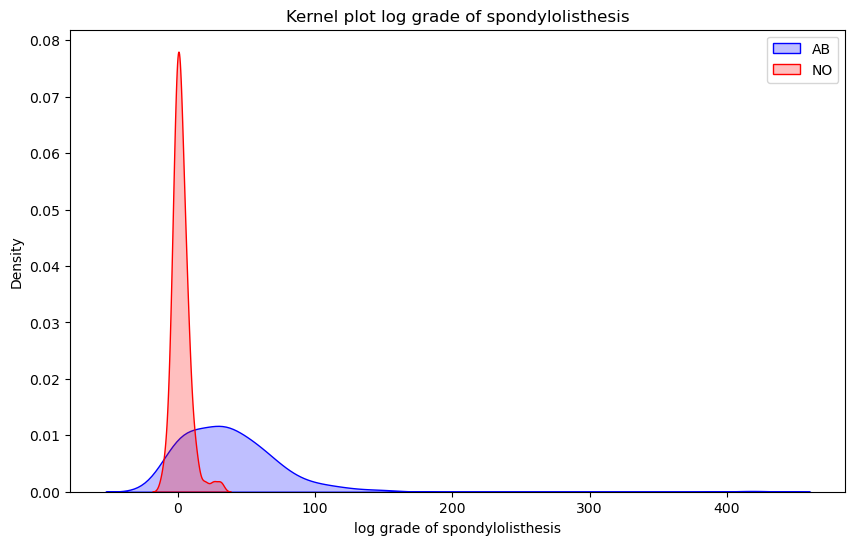

In [13]:
# Create a kernel density plot for each class
plt.figure(figsize=(10, 6))
sns.kdeplot(ab_df['grade of spondylolisthesis'], color='blue', label='AB', shade=True)
sns.kdeplot(no_df['grade of spondylolisthesis'], color='red', label='NO', shade=True)

# Customize plot labels and appearance
plt.xlabel('log grade of spondylolisthesis')
plt.ylabel('Density')
plt.title('Kernel plot log grade of spondylolisthesis')
plt.legend()
plt.show()

-11.06


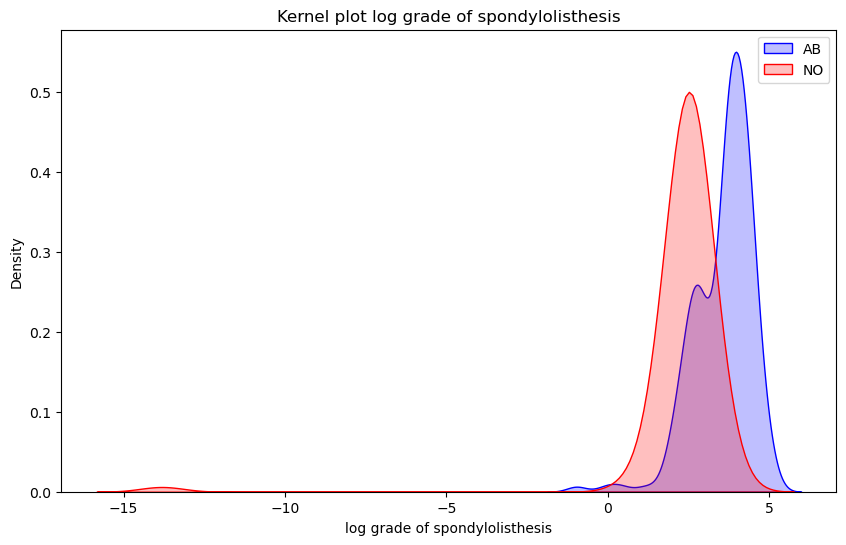

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,class,log grade of spondylolisthesis
0,63.03,22.55,39.61,40.48,98.67,AB,2.380472
1,39.06,10.06,25.02,29.00,114.41,AB,2.748552
2,68.83,22.22,50.09,46.61,105.99,AB,2.018895
3,69.30,24.65,44.31,44.64,101.87,AB,3.103241
4,49.71,9.65,28.32,40.06,108.17,AB,2.943386


In [14]:
from math import log

# Find the smallest negative value
min_val = df_imputed['grade of spondylolisthesis'].min()
print(min_val)

# Add the absolute value of the smallest negative value plus a small epsilon
epsilon = 1e-6
df_imputed['grade of spondylolisthesis'] = df_imputed['grade of spondylolisthesis'] - min_val + epsilon

# Perform the log transformation
df_imputed['log grade of spondylolisthesis'] = df_imputed['grade of spondylolisthesis'].apply(log)

df_imputed = df_imputed.drop('grade of spondylolisthesis', axis = 1)

# Separate majority and minority classes
ab_df = df_imputed[df_imputed['class'] == 'AB']
no_df = df_imputed[df_imputed['class'] == 'NO']

# Create a kernel density plot for each class
plt.figure(figsize=(10, 6))
sns.kdeplot(ab_df['log grade of spondylolisthesis'], color='blue', label='AB', shade=True)
sns.kdeplot(no_df['log grade of spondylolisthesis'], color='red', label='NO', shade=True)

# Customize plot labels and appearance
plt.xlabel('log grade of spondylolisthesis')
plt.ylabel('Density')
plt.title('Kernel plot log grade of spondylolisthesis')
plt.legend()
plt.show()

df_imputed.head()

# Class balancing

In [15]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Label encode the 'Category' column
label_encoder = LabelEncoder()
df_imputed['class'] = label_encoder.fit_transform(df_imputed['class'])
print("Original Labels:", label_encoder.classes_)

df_imputed.head()

Original Labels: ['AB' 'NO']


,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,class,log grade of spondylolisthesis
0,63.03,22.55,39.61,40.48,98.67,0,2.380472
1,39.06,10.06,25.02,29.00,114.41,0,2.748552
2,68.83,22.22,50.09,46.61,105.99,0,2.018895
3,69.30,24.65,44.31,44.64,101.87,0,3.103241
4,49.71,9.65,28.32,40.06,108.17,0,2.943386


As the multivariate scatter plots have shown that the points of class NO are within the range of cluster of points of class AB. Therefore the model we choose must be able to handle these clustering points of mixed class.

One more issue is that the class samples are imbalance, with AB being the majority class and NO being the minority class. If we train the model with the entire data and validate it based on accuracy, the accuracy reflects more on the accuracy on the model classifying the majority class instead of the minority class. Here are some methods that can direct to issue:

- Random Undersampling:
    Randomly remove instances from the majority class to match the number of instances of the minority class.
- Random Oversampling:
    Duplicate instances from the minority class into the dataframe to match the number of instances of the majority class.
    
Other than that, there are male and female patients which was implied by the bimodal distribution of the histograms from pelvic incidence and grade of spondylolisthesis. But notice that the NO class patients have less of a bimodal distributions compare to AB class.

In [16]:
# Choosing to oversample normal class given that the global population of normal patients is much greater than abnormal 
# which creates less bias compare to undersampling abnormal class.
from sklearn.utils import resample

# Separate majority and minority classes
ab_df = df_imputed[df_imputed['class'] == 0]
no_df = df_imputed[df_imputed['class'] == 1]

# Upsample minority class
df_minority_upsampled = resample(no_df, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(ab_df),    # to match majority class
                                 random_state=42) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([ab_df, df_minority_upsampled])

# Display the number of instances in each class after oversampling
print("Class distribution after oversampling:")
print(df_upsampled['class'].value_counts())

Class distribution after oversampling:
class
0    209
1    209
Name: count, dtype: int64


In [17]:
df_upsampled.reset_index(drop = True, inplace = True)
# df_upsampled = df_upsampled.drop('index', axis = 1)

# PCA Transformation

Eigenvalues:
[3.20171566e+00 1.08867292e+00 7.56003086e-01 6.84831567e-01
 2.83165198e-01 6.02239576e-08]

Eigenvectors:
[[ 5.36466745e-01  3.35675862e-01  4.77470416e-01  4.60768407e-01
  -2.31784067e-01  3.24831912e-01]
 [ 3.16603503e-02  5.56114125e-01  9.67300320e-02 -3.69392089e-01
   6.93871812e-01  2.49938784e-01]
 [ 2.00690654e-01  5.84966109e-01 -1.48438380e-01 -1.67342400e-01
  -2.97006159e-01 -6.92306162e-01]
 [ 1.54625637e-01 -2.56759262e-01  2.99011808e-01  3.94234513e-01
   5.75233040e-01 -5.78311016e-01]
 [-3.41591024e-01 -6.25295418e-02  8.06984070e-01 -4.05199473e-01
  -2.13804458e-01 -1.35216049e-01]
 [ 7.28238147e-01 -4.07477832e-01  5.92221843e-06 -5.51027238e-01
   4.28496642e-06 -2.98096831e-06]]

Variances of each PC:
[5.32342676e-01 1.81011406e-01 1.25699078e-01 1.13865536e-01
 4.70812948e-02 1.00133135e-08]

Cumulative variance:
[0.53234268 0.71335408 0.83905316 0.9529187  0.99999999 1.        ]


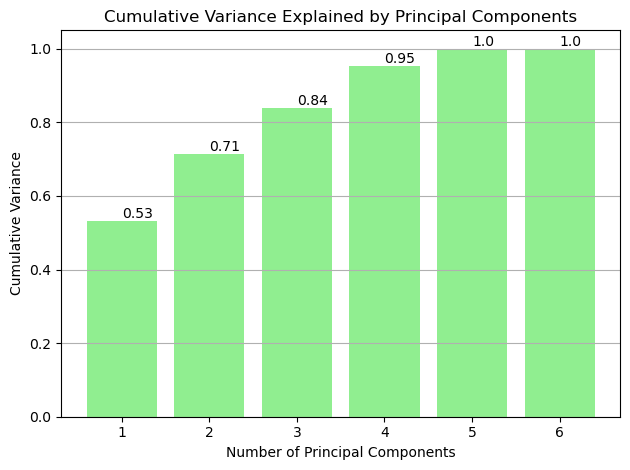

In [18]:
from sklearn.decomposition import PCA

# Now for feature selection based on PCA
# Standardize the data

# Separate features and target variable
X = df_upsampled.drop('class', axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()  # No need to specify the number of components for variance analysis
X_pca = pca.fit_transform(X_scaled)

# Extract eigenvalues
eigenvalues = pca.explained_variance_

# Extract eigenvectors
eigenvectors = pca.components_

# Print eigenvalues and eigenvectors
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

# Calculate proportion of variances and cumulative variance
proportion_variance = pca.explained_variance_ratio_
cumulative_variance = proportion_variance.cumsum()

print("\nVariances of each PC:")
print(proportion_variance)

print("\nCumulative variance:")
print(cumulative_variance)

# Bar plot for cumulative variance
bars = plt.bar(range(1, len(cumulative_variance) + 1), cumulative_variance, color='lightgreen')

# Display cumulative variance on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')
    
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance')
plt.grid(axis='y')

plt.tight_layout()

# Save figure
plt.savefig('cumsum_pc.png')

plt.show()

In [19]:
# See the standardized data
X_scaled[:5]

array([[ 0.27171104,  0.59967934, -0.59255597, -0.08438083, -1.63558289,
        -0.54542642],
       [-1.17277711, -0.74553197, -1.39946666, -0.9986538 , -0.3636229 ,
        -0.23368561],
       [ 0.62123258,  0.56413733, -0.01295186,  0.40381545, -1.04404877,
        -0.8516588 ],
       [ 0.64955588,  0.82585578, -0.33261901,  0.24692366, -1.37698874,
         0.06671288],
       [-0.53098325, -0.78969023, -1.21695773, -0.11782984, -0.8678815 ,
        -0.06867389]])

In [20]:
# Create a DataFrame to display the loadings
loadings_df = pd.DataFrame(pca.components_, columns=X.columns)

# Assuming loadings_df is your DataFrame
# Reindex the DataFrame and prefix the index with "PC"
loadings_df.index = loadings_df.index + 1
loadings_df = loadings_df.rename_axis('Principal Component').rename(lambda x: f'PC{x}')

loadings_df

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,log grade of spondylolisthesis
Principal Component,,,,,,
PC1,0.536467,0.335676,0.477470,0.460768,-0.231784,0.324832
PC2,0.031660,0.556114,0.096730,-0.369392,0.693872,0.249939
PC3,0.200691,0.584966,-0.148438,-0.167342,-0.297006,-0.692306
PC4,0.154626,-0.256759,0.299012,0.394235,0.575233,-0.578311
PC5,-0.341591,-0.062530,0.806984,-0.405199,-0.213804,-0.135216
PC6,0.728238,-0.407478,0.000006,-0.551027,0.000004,-0.000003


In [21]:
# Calculate PCs
PC1 = np.dot([ 0.27171104, 0.59967934 ,-0.59255597, -0.08438083, -1.63558289, -0.80786017], eigenvectors.T)
PC1

array([ 1.41937141e-01, -1.02085618e+00,  1.55246526e+00, -7.96053681e-01,
       -1.15373313e-01,  2.33293943e-06])

In [22]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# Perform PCA with number of components that retains most of the variance of the data
pca = PCA(n_components=4)  # Specify the number of components
principal_components = pca.fit_transform(X)

# Create a DataFrame for the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])

principal_df.head()

,PC1,PC2,PC3,PC4
0,0.266852,-20.311021,12.035397,4.422804
1,-33.369918,-11.120511,2.127163,1.594933
2,11.496055,-11.815209,7.340848,0.657387
3,8.578522,-16.581489,12.690572,1.237633
4,-19.255193,-18.502487,1.807677,-4.058093


# K Mean Clustering

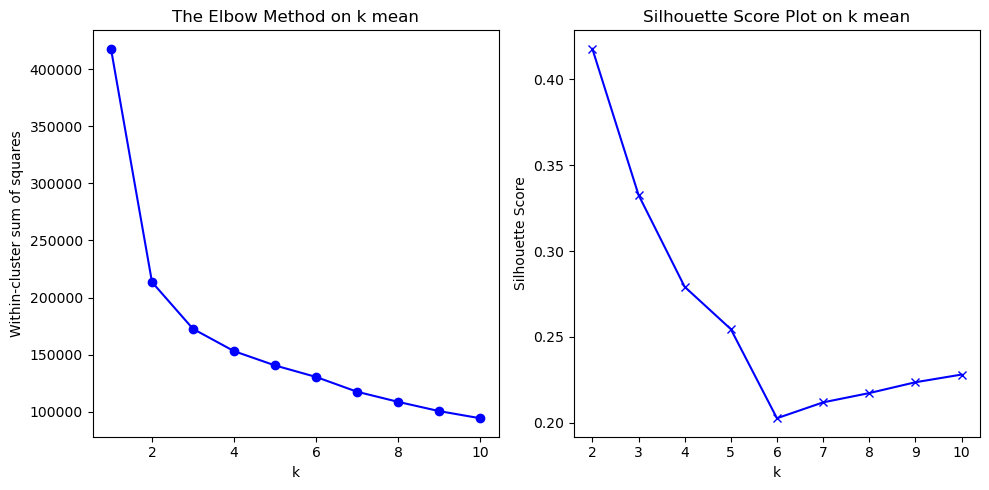

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = principal_df.copy()

# Elbow Method to determine the optimal number of clusters
distortions = []
sil_scores = []
K = range(1, 11)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state = 42)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
    
sil_scores = []
K2 = range(2, 11)
for k in K2:
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    sil_scores.append(silhouette_avg)
    
# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Elbow plot
axes[0].plot(K, distortions, 'bo-')
axes[0].set_xlabel('k')
axes[0].set_ylabel('Within-cluster sum of squares')
axes[0].set_title('The Elbow Method on k mean')

# Silhouette plot
axes[1].plot(K2, sil_scores, 'bx-')
axes[1].set_xlabel('k')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score Plot on k mean')

# Adjust layout
plt.tight_layout()

# Savefig
plt.savefig('elbow_silhoutte.png')

# Show the subplots
plt.show()

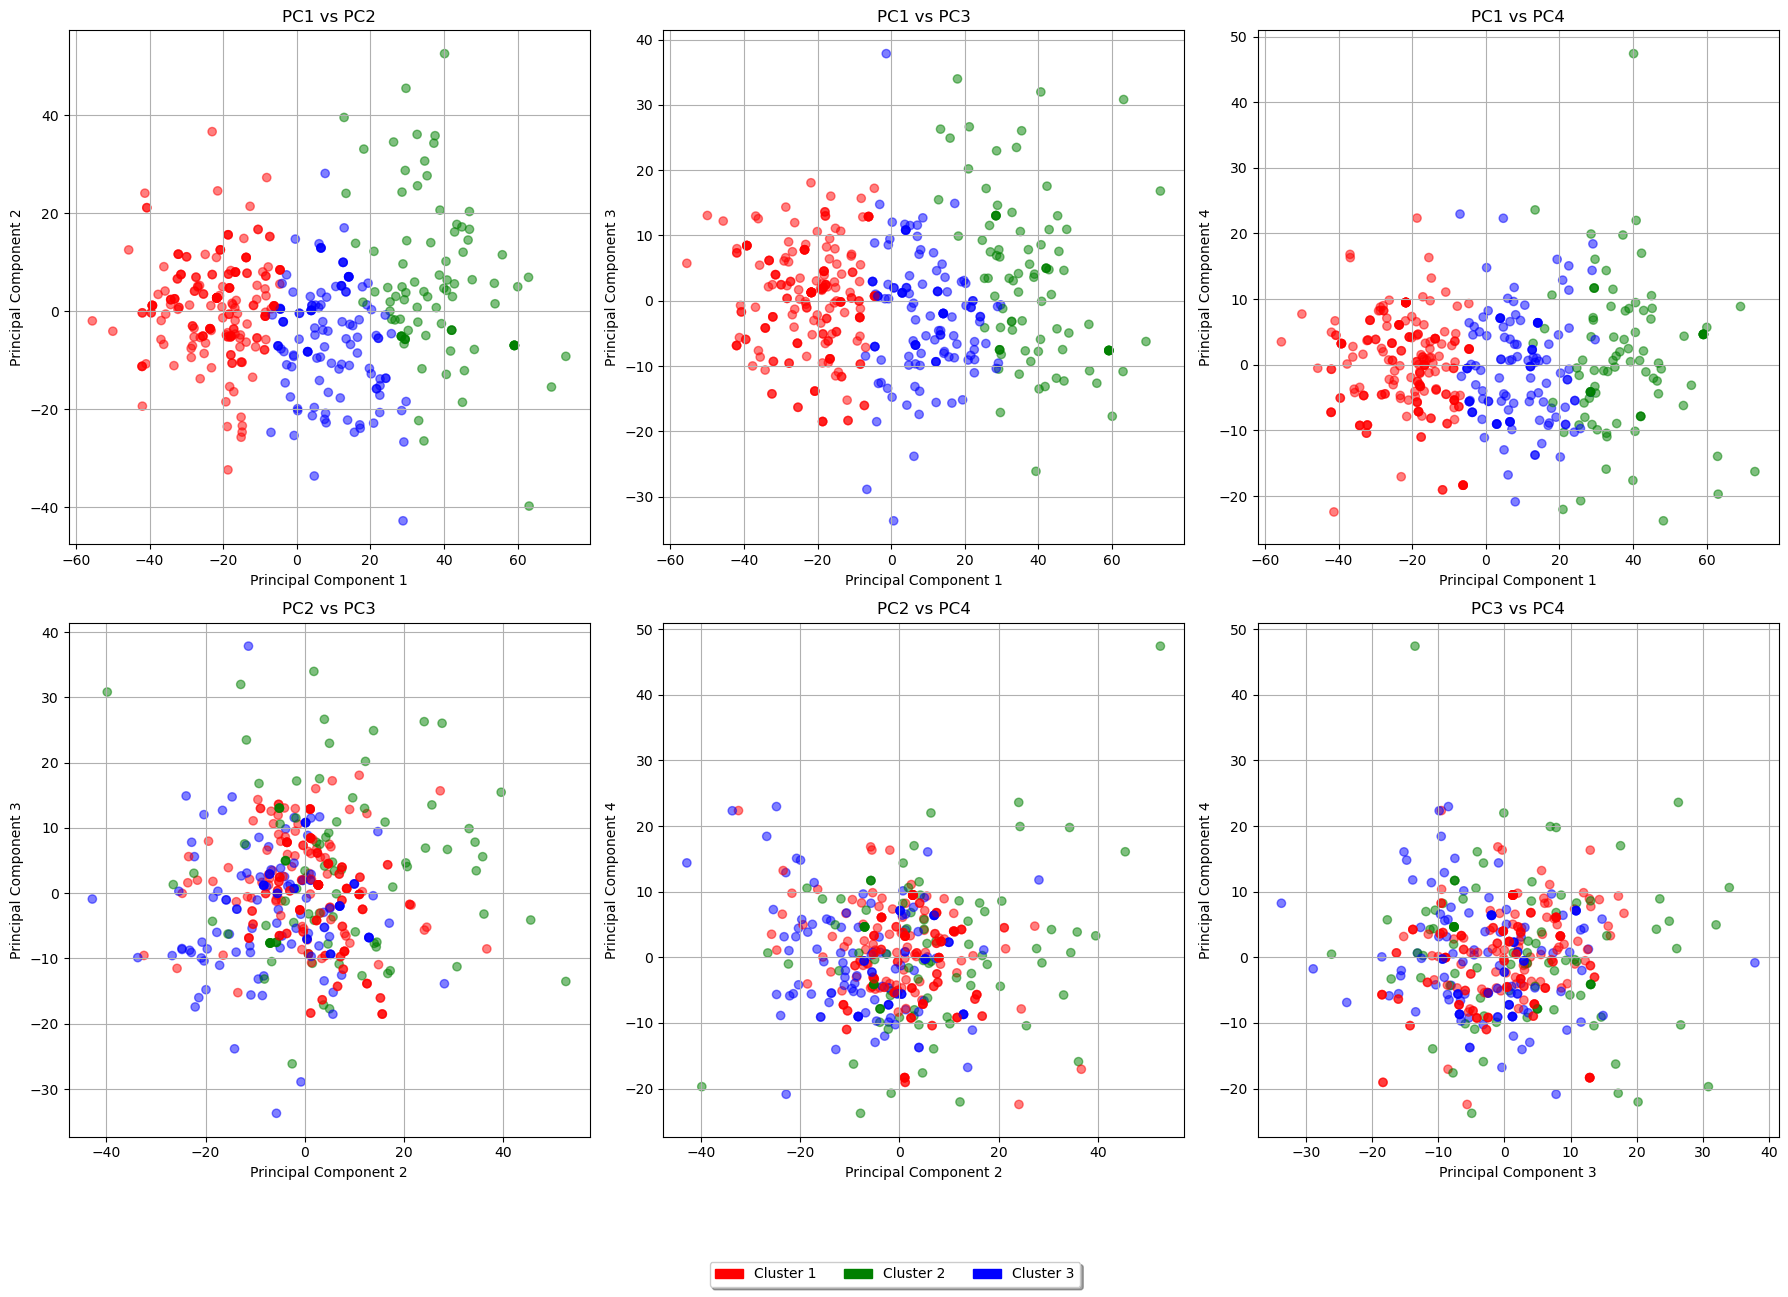

In [24]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors

# Making the prediction with optimal k
op_k = 3

kmeans = KMeans(n_clusters=op_k)
cluster_labels = kmeans.fit_predict(X)
principal_df['cluster'] = cluster_labels

# Define colors for clusters
colors = ['r', 'g', 'b']

# Visualize the data
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Scatter plot 1
scatter1 = axes[0, 0].scatter(principal_df['PC1'], principal_df['PC2'], c=principal_df['cluster'], cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
axes[0, 0].set_title('PC1 vs PC2')
axes[0, 0].set_xlabel('Principal Component 1')
axes[0, 0].set_ylabel('Principal Component 2')
axes[0, 0].grid()

# Scatter plot 2
scatter2 = axes[0, 1].scatter(principal_df['PC1'], principal_df['PC3'], c=principal_df['cluster'], cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
axes[0, 1].set_title('PC1 vs PC3')
axes[0, 1].set_xlabel('Principal Component 1')
axes[0, 1].set_ylabel('Principal Component 3')
axes[0, 1].grid()

# Scatter plot 3
scatter3 = axes[0, 2].scatter(principal_df['PC1'], principal_df['PC4'], c=principal_df['cluster'], cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
axes[0, 2].set_title('PC1 vs PC4')
axes[0, 2].set_xlabel('Principal Component 1')
axes[0, 2].set_ylabel('Principal Component 4')
axes[0, 2].grid()

# Scatter plot 4
scatter4 = axes[1, 0].scatter(principal_df['PC2'], principal_df['PC3'], c=principal_df['cluster'], cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
axes[1, 0].set_title('PC2 vs PC3')
axes[1, 0].set_xlabel('Principal Component 2')
axes[1, 0].set_ylabel('Principal Component 3')
axes[1, 0].grid()

# Scatter plot 5
scatter5 = axes[1, 1].scatter(principal_df['PC2'], principal_df['PC4'], c=principal_df['cluster'], cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
axes[1, 1].set_title('PC2 vs PC4')
axes[1, 1].set_xlabel('Principal Component 2')
axes[1, 1].set_ylabel('Principal Component 4')
axes[1, 1].grid()

# Scatter plot 6
scatter6 = axes[1, 2].scatter(principal_df['PC3'], principal_df['PC4'], c=principal_df['cluster'], cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
axes[1, 2].set_title('PC3 vs PC4')
axes[1, 2].set_xlabel('Principal Component 3')
axes[1, 2].set_ylabel('Principal Component 4')
axes[1, 2].grid()

# Create custom legend handles with desired colors
legend_handles = [mpatches.Patch(color=color, label=f'Cluster {i+1}') for i, color in enumerate(colors)]
fig.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=op_k)

plt.tight_layout()

# Save fig
plt.savefig('PC_clustering.png')

plt.show()


# Supervised model

Each class cluster is intertwined, hence the following models are considered for this classification problem:
- Random Forest
- SVM

In [41]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, recall_score, accuracy_score, make_scorer, log_loss
import numpy as np

# Separate the features and the target for upsampled data
X = df_upsampled.drop('class', axis = 1)
y = df_upsampled['class']

# Define custom scorers
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)
recall_scorer_class_0 = make_scorer(recall_score, pos_label=0)
accuracy_scorer = make_scorer(accuracy_score)


# Heavier weight on AB than NO
class_weights = {0: 2, 1: 1} 

# Initialize classifiers

classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Classifier": SVC(kernel='rbf', class_weight = class_weights , probability=True, random_state=42)
}

# Define scorers for training and test sets
scorers_train = {
    'Training ROC AUC': roc_auc_scorer,
    'Training Recall on class 0': recall_scorer_class_0,
    'Training Accuracy': accuracy_scorer
}

scorers_test = {
    "Test ROC AUC": roc_auc_scorer,
    "Test Recall on class 0": recall_scorer_class_0,
    "Test Accuracy": accuracy_scorer
}

# Initialize an empty list to store results
results_list = []

# Define the number of folds for stratified cross-validation
n_splits = 5

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation for each classifier using stratified k-fold
for model_name, model in classifiers.items():
    cv_results_train = cross_validate(model, X, y, cv=stratified_kfold, scoring=scorers_train, return_train_score=True)
    cv_results_test = cross_validate(model, X, y, cv=stratified_kfold, scoring=scorers_test)

    # Calculate mean scores for training set
    mean_train_roc_auc = np.mean(cv_results_train['train_Training ROC AUC'])
    mean_train_recall = np.mean(cv_results_train['train_Training Recall on class 0'])
    mean_train_accuracy = np.mean(cv_results_train['train_Training Accuracy'])
    
    # Calculate mean scores for test set
    mean_test_roc_auc = np.mean(cv_results_test['test_Test ROC AUC'])
    mean_test_recall = np.mean(cv_results_test['test_Test Recall on class 0'])
    mean_test_accuracy = np.mean(cv_results_test['test_Test Accuracy'])
    
    # Append mean scores to the results list
    results_list.append({
        "Model": model_name,
        "Data": 'Before PCA',
        "Training ROC AUC": mean_train_roc_auc,
        "Training Recall on class 0": mean_train_recall,
        "Training Accuracy": mean_train_accuracy,
        "Test ROC AUC": mean_test_roc_auc,
        "Test Recall on class 0": mean_test_recall,
        "Test Accuracy": mean_test_accuracy
    })


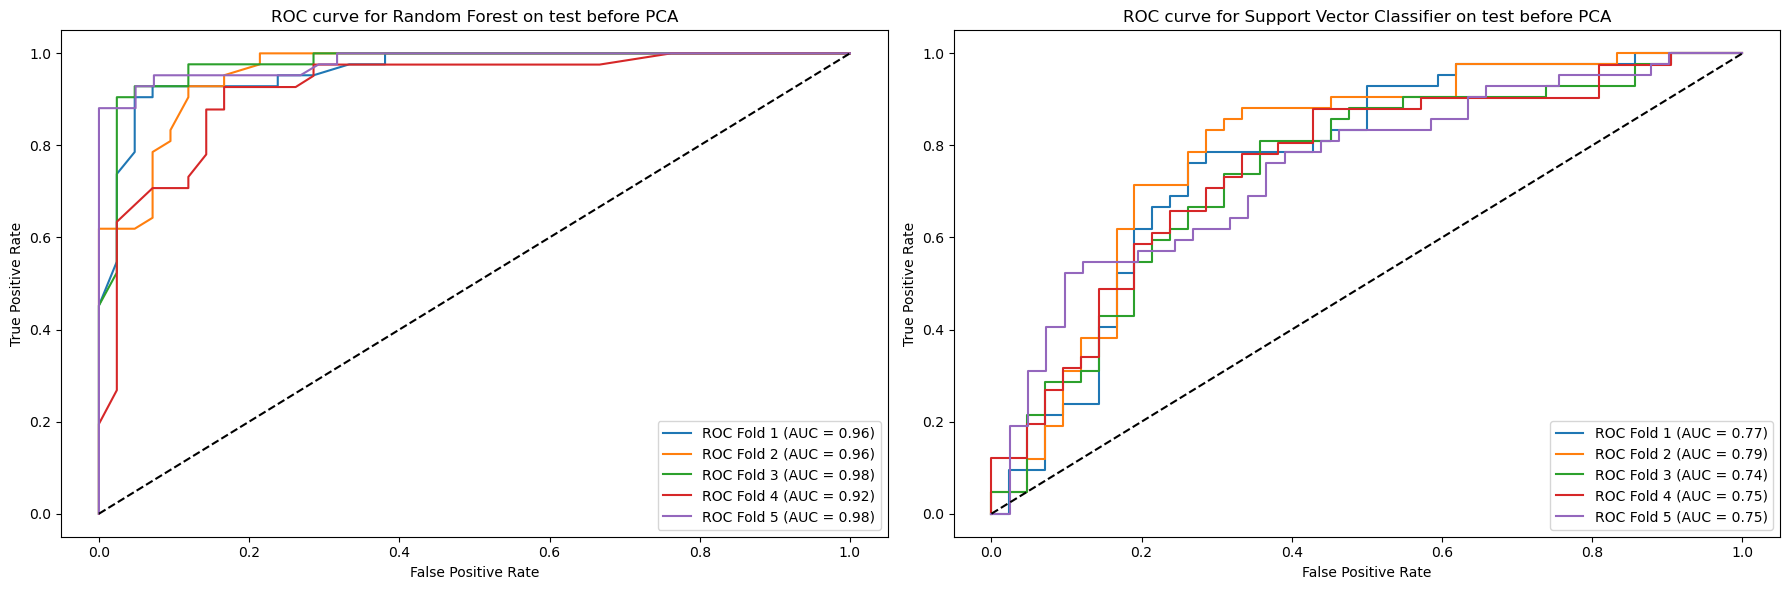

In [42]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc

# Initialize a figure with three subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Iterate over each model and plot its ROC curve in a subplot
for i, (model_name, model) in enumerate(classifiers.items()):
    ax = axs[i]
    ax.set_title(f'ROC curve for {model_name} on test before PCA')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    
    for j in range(5):
        # Use cross_val_predict within the loop to get predictions for each fold
        y_prob = cross_val_predict(model, X, y, cv=5, method='predict_proba')
        fold_indices = np.where((y.index % 5) == j)  # Get indices of samples for current fold
        fold_X = X.iloc[fold_indices]  # Get features for current fold
        fold_y = y.iloc[fold_indices]  # Get labels for current fold
        fold_y_prob = y_prob[fold_indices]  # Get predicted probabilities for current fold
        
        fpr, tpr, _ = roc_curve(fold_y, fold_y_prob[:, 1])
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, label=f'ROC Fold {j+1} (AUC = {roc_auc:.2f})')
    ax.plot([0,1], [0,1],color='black', linestyle='--',)
    ax.legend(loc='lower right')

plt.tight_layout()

# Save fig
plt.savefig('roc_auc_before.png')

plt.show()

In [43]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, recall_score, accuracy_score, make_scorer, log_loss
import numpy as np

# Separate the features and the target for principal_df
X = principal_df.iloc[:,:4]
y = df_upsampled['class']

# Define custom scorers
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)
recall_scorer_class_0 = make_scorer(recall_score, pos_label=0)
accuracy_scorer = make_scorer(accuracy_score)


# Heavier weight on AB than NO
class_weights = {0: 2, 1: 1} 

# Initialize classifiers

classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Classifier": SVC(kernel='rbf',class_weight = {0: 2, 1: 1} , probability=True, random_state=42)
}

# Define scorers for training and test sets
scorers_train = {
    'Training ROC AUC': roc_auc_scorer,
    'Training Recall on class 0': recall_scorer_class_0,
    'Training Accuracy': accuracy_scorer
}

scorers_test = {
    "Test ROC AUC": roc_auc_scorer,
    "Test Recall on class 0": recall_scorer_class_0,
    "Test Accuracy": accuracy_scorer
}


# Define the number of folds for stratified cross-validation
n_splits = 5

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation for each classifier using stratified k-fold
for model_name, model in classifiers.items():
    cv_results_train = cross_validate(model, X, y, cv=stratified_kfold, scoring=scorers_train, return_train_score=True)
    cv_results_test = cross_validate(model, X, y, cv=stratified_kfold, scoring=scorers_test)

    # Calculate mean scores for training set
    mean_train_roc_auc = np.mean(cv_results_train['train_Training ROC AUC'])
    mean_train_recall = np.mean(cv_results_train['train_Training Recall on class 0'])
    mean_train_accuracy = np.mean(cv_results_train['train_Training Accuracy'])
    
    # Calculate mean scores for test set
    mean_test_roc_auc = np.mean(cv_results_test['test_Test ROC AUC'])
    mean_test_recall = np.mean(cv_results_test['test_Test Recall on class 0'])
    mean_test_accuracy = np.mean(cv_results_test['test_Test Accuracy'])
    
    # Append mean scores to the results list
    results_list.append({
        "Model": model_name,
        "Data": 'After PCA',
        "Training ROC AUC": mean_train_roc_auc,
        "Training Recall on class 0": mean_train_recall,
        "Training Accuracy": mean_train_accuracy,
        "Test ROC AUC": mean_test_roc_auc,
        "Test Recall on class 0": mean_test_recall,
        "Test Accuracy": mean_test_accuracy
    })

# Convert the results list into a DataFrame
two_results_df = pd.DataFrame(results_list)

two_results_df.set_index('Model')

,Data,Training ROC AUC,Training Recall on class 0,Training Accuracy,Test ROC AUC,Test Recall on class 0,Test Accuracy
Model,,,,,,,
Random Forest,Before PCA,1.000000,1.000000,1.000000,0.984893,0.861440,0.913884
Support Vector Classifier,Before PCA,0.823854,0.918663,0.684236,0.814324,0.913937,0.679375
Random Forest,After PCA,1.000000,1.000000,1.000000,0.958950,0.822997,0.894779
Support Vector Classifier,After PCA,0.870787,0.885173,0.774541,0.845620,0.871196,0.744062


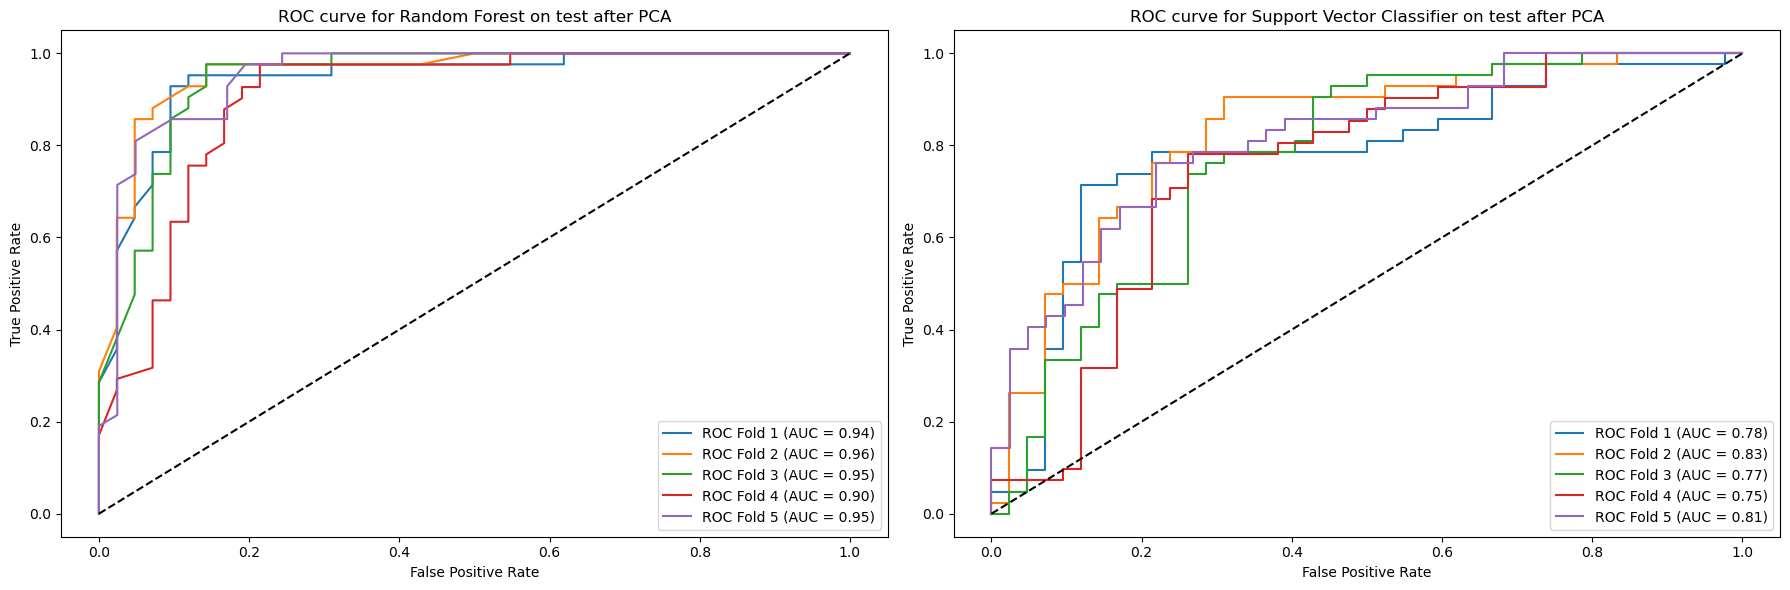

In [44]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc

# Initialize a figure with three subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Iterate over each model and plot its ROC curve in a subplot
for i, (model_name, model) in enumerate(classifiers.items()):
    ax = axs[i]
    ax.set_title(f'ROC curve for {model_name} on test after PCA')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    
    for j in range(5):
        # Use cross_val_predict within the loop to get predictions for each fold
        y_prob = cross_val_predict(model, X, y, cv=5, method='predict_proba')
        fold_indices = np.where((y.index % 5) == j)  # Get indices of samples for current fold
        fold_X = X.iloc[fold_indices]  # Get features for current fold
        fold_y = y.iloc[fold_indices]  # Get labels for current fold
        fold_y_prob = y_prob[fold_indices]  # Get predicted probabilities for current fold
        
        fpr, tpr, _ = roc_curve(fold_y, fold_y_prob[:, 1])
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, label=f'ROC Fold {j+1} (AUC = {roc_auc:.2f})')
    ax.plot([0,1], [0,1],color='black', linestyle='--',)
    ax.legend(loc='lower right')

plt.tight_layout()

# Save fig
plt.savefig('roc_auc.png')

plt.show()